# Li intercalation energies into anion-substituted anatase TiO<sub>2</sub>

Benjamin J. Morgan

This notebook contains the calculation of lithium-intercalation energies into anion-substituted anatase TiO<sub>2</sub>. The intercalated systems are 3×3×1 supercells of anatase TiO<sub>2</sub>, containing 1 Ti vacancy, with four charge-compensating *X* anions in adjacent equatorial sites, to give a defect cluster [*V*<sub>Ti</sub>+4*X*<sub>O</sub>]. The substituent anions, *X*, are either OH or F.

The intercalation energies are calculated from VASP data, contained in the dataset [&ldquo;TODO&rdquo;](TODO). These calculations are described in the dataset `README` and in the paper [&ldquo;TODO&rdquo;](TODO).

The calculated energies are compared to the intercalation energy into stoichiometric anatase TiO<sub>2</sub> (1 Li in a 3×3×1 supercell).

In [1]:
import pandas as pd
import numpy as np
from vasppy.calculation import *
from itertools import product
import version_information

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# import figure_formatting
from figure_formatting import rcParams
from figure_formatting import master_formatting, nearly_black, tableau10

rcParams.update( master_formatting )

In [3]:
def select_entries( keys, fulldict ):
    return dict( ( k, fulldict[k] ) for k in keys )

In [4]:
# load calculation data
all_stoichiometric = import_calculations_from_file( '../data/stoichiometric_anatase.yaml' )
stoichiometric = select_entries( [ 'stoichiometric anatase',
                                   'stoichiometric anatase + Li',
                                   'stoichiometric anatase + Mg',
                                   'stoichiometric anatase + Al',
                                   'stoichiometric anatase + Ca',
                                   'stoichiometric anatase + Na'],
                                all_stoichiometric )
                                
all_tio2_calculations = import_calculations_from_file( '../Data/vacancy_intercalation.yaml' )
calc_ions = [ '+ Li', '+ Mg', '+ Al', '+ Na', '+ Ca', 'stoichiometric' ]
calc_anions = [ '4OH', '1F+3OH', '2F+2OH cis', '2F+2OH trans', '3F+1OH', '4F' ]
tio2_calculations = []

tio2_calculation_strings = [ 'TiO2 {} {}'.format( a, i ) for a, i in product( calc_anions, calc_ions ) ]
tio2_calculations = select_entries( tio2_calculation_strings, all_tio2_calculations )
all_elemental_reference = import_calculations_from_file( '../Data/elemental_reference.yaml' )
elemental_reference = select_entries( ['elemental Li', 'elemental Mg', 'elemental Al', 'elemental Na', 'elemental Ca'], all_elemental_reference )

calculations = {**stoichiometric, **tio2_calculations, **elemental_reference}

In [5]:
for c in calculations:
    print( c )

stoichiometric anatase
stoichiometric anatase + Li
stoichiometric anatase + Mg
stoichiometric anatase + Al
stoichiometric anatase + Ca
stoichiometric anatase + Na
TiO2 4OH + Li
TiO2 4OH + Mg
TiO2 4OH + Al
TiO2 4OH + Na
TiO2 4OH + Ca
TiO2 4OH stoichiometric
TiO2 1F+3OH + Li
TiO2 1F+3OH + Mg
TiO2 1F+3OH + Al
TiO2 1F+3OH + Na
TiO2 1F+3OH + Ca
TiO2 1F+3OH stoichiometric
TiO2 2F+2OH cis + Li
TiO2 2F+2OH cis + Mg
TiO2 2F+2OH cis + Al
TiO2 2F+2OH cis + Na
TiO2 2F+2OH cis + Ca
TiO2 2F+2OH cis stoichiometric
TiO2 2F+2OH trans + Li
TiO2 2F+2OH trans + Mg
TiO2 2F+2OH trans + Al
TiO2 2F+2OH trans + Na
TiO2 2F+2OH trans + Ca
TiO2 2F+2OH trans stoichiometric
TiO2 3F+1OH + Li
TiO2 3F+1OH + Mg
TiO2 3F+1OH + Al
TiO2 3F+1OH + Na
TiO2 3F+1OH + Ca
TiO2 3F+1OH stoichiometric
TiO2 4F + Li
TiO2 4F + Mg
TiO2 4F + Al
TiO2 4F + Na
TiO2 4F + Ca
TiO2 4F stoichiometric
elemental Li
elemental Mg
elemental Al
elemental Na
elemental Ca


In [6]:
ions = [ 'Li', 'Na', 'Mg', 'Ca', 'Al' ]
for i in ions:
    calculations['elemental {}'.format(i)] /= calculations['elemental {}'.format(i)].stoichiometry[i]

In [7]:
to_calculate = [ [ 4, '4F' ],
                 [ 3, '3F+1OH' ],
                 [ 2, '2F+2OH cis' ],
                 [ 2, '2F+2OH trans' ],
                 [ 1, '1F+3OH' ],
                 [ 0, '4OH' ] ]

to_plot = []
for n_F, string in to_calculate:
#     print( n_OH, string )
    intercalation_energies = [ delta_E( [ calculations['TiO2 {} stoichiometric'.format( string )], calculations['elemental {}'.format(i)] ], 
                                    [ calculations['TiO2 {} + {}'.format( string, i ) ] ] ) for i in ions ]
    to_plot.append( [n_F] + intercalation_energies )
    
anatase_intercalation_energies = [ delta_E( [ calculations['stoichiometric anatase'], calculations['elemental {}'.format(i)] ], 
                                            [ calculations['stoichiometric anatase + {}'.format( i ) ] ] )  for i in ions ] 
to_plot.append( ['stoich'] + anatase_intercalation_energies )

In [8]:
df = pd.DataFrame( to_plot, columns=[ 'n_F' ]+ions )
df.round(3)

,n_F,Li,Na,Mg,Ca,Al
0,4,-2.683,-1.876,-3.297,-2.907,-3.073
1,3,-1.980,-0.968,-2.424,-2.388,-2.764
2,2,-1.857,-0.905,-2.468,-2.278,-2.490
3,2,-1.797,-0.856,-2.446,-2.149,-2.470
4,1,-1.462,-0.469,-2.063,-1.808,-2.201
5,0,-1.342,-0.220,-1.527,-1.374,-2.647
6,stoich,-1.516,0.032,-1.019,-0.346,-1.247


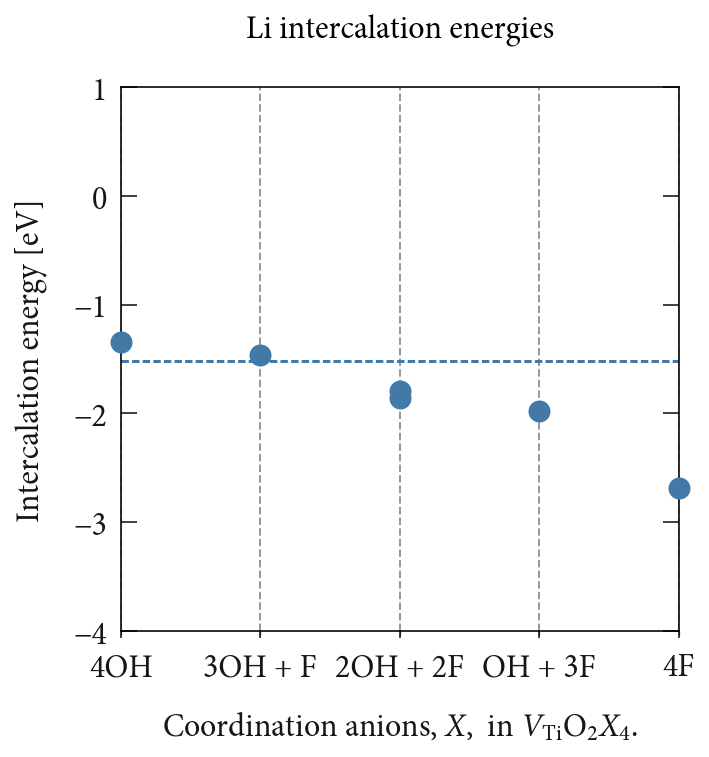

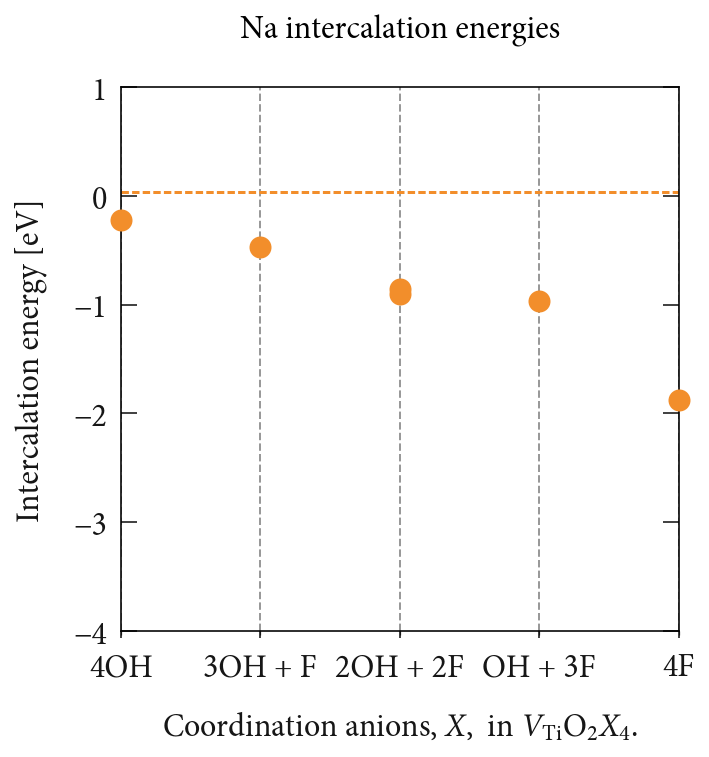

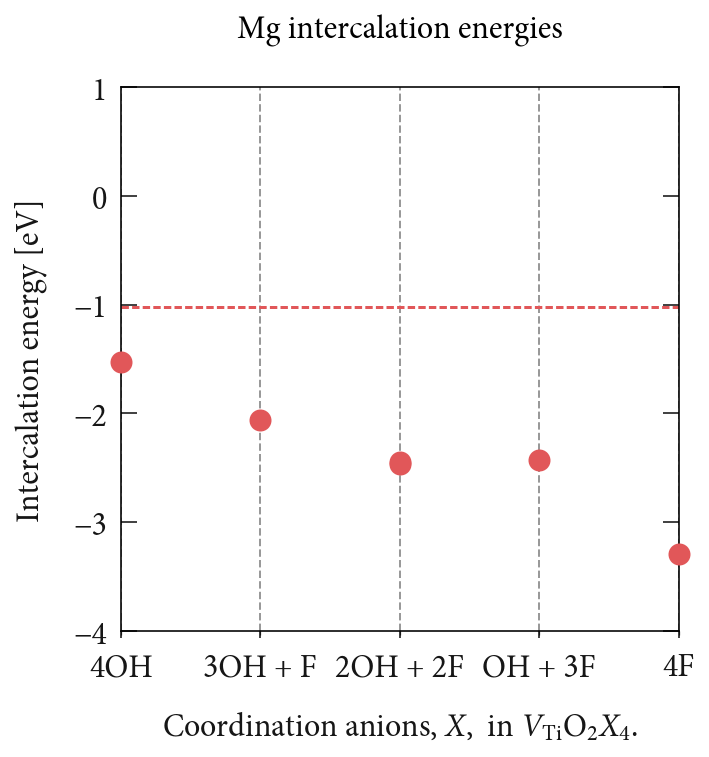

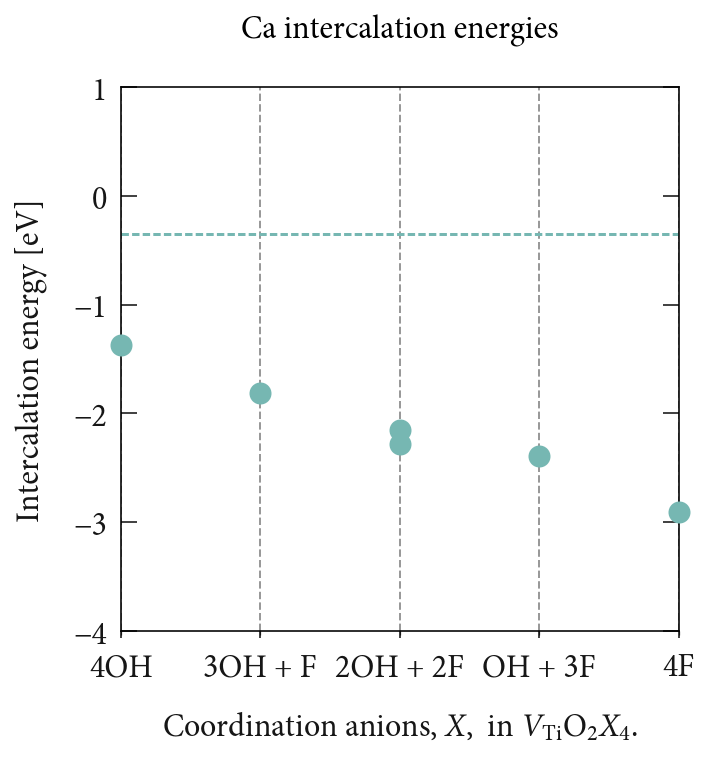

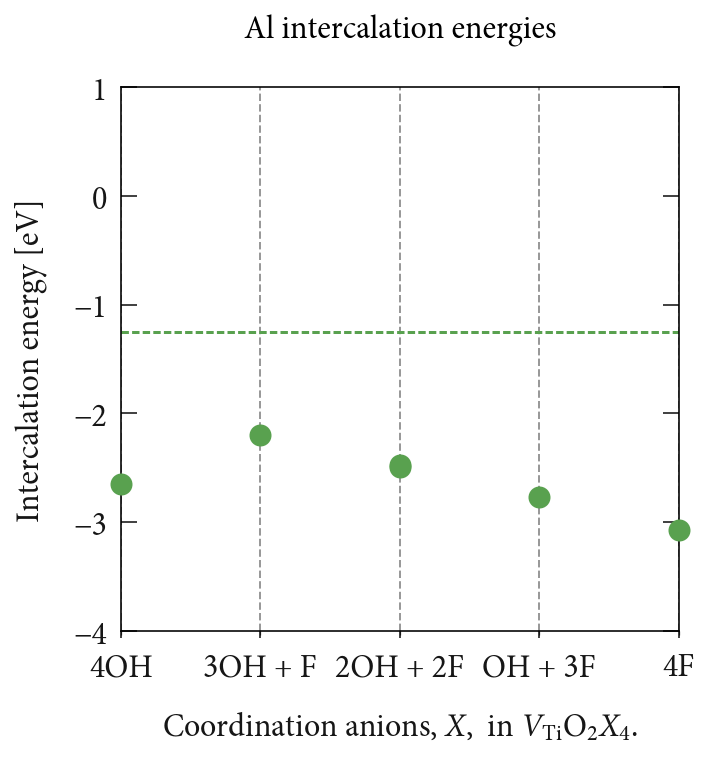

In [9]:
%%capture --no-stdout --no-display error
labels = [ 'a', 'b', 'c', 'd', 'e']
for c, i in enumerate( ions ):
    fig, ax = plt.subplots(1, 1, figsize=(5,5))
    ax.plot( df['n_F'][:-1], df[i][:-1], 'o', color=tableau10[c], clip_on=False, zorder=10 )
    ax.axhline( df[i].values[-1], linestyle='--', color=tableau10[c] )
    ax.set_xticks( [ 0, 1, 2, 3, 4 ], [ r'4OH', '3OH + F','2OH + 2F','OH + 3F','4F'] )
    ax.set_xlim( 0, 4 )
    ax.set_xticks( [ 0, 1, 2, 3, 4 ] )
    ax.set_xticklabels( [ r'4OH', '3OH + F','2OH + 2F','OH + 3F','4F'] )
    ax.set_yticks( [ -4.0, -3.0, -2.0, -1.0, 0.0, +1.0 ] )
    ax.set_ylim( -4, 1.0 )
    ax.grid( axis='x', color='grey', linestyle='--')
    ax.set_ylabel( 'Intercalation energy [eV]' )
    ax.set_xlabel( r'Coordination anions, $X$,  in $V_\mathrm{Ti}$O$_2X_4$.' )
    ax.set_title('{} intercalation energies'.format( i ) )
    plt.savefig( '../figures/{}_intercalation_energies.pdf'.format( i ) )

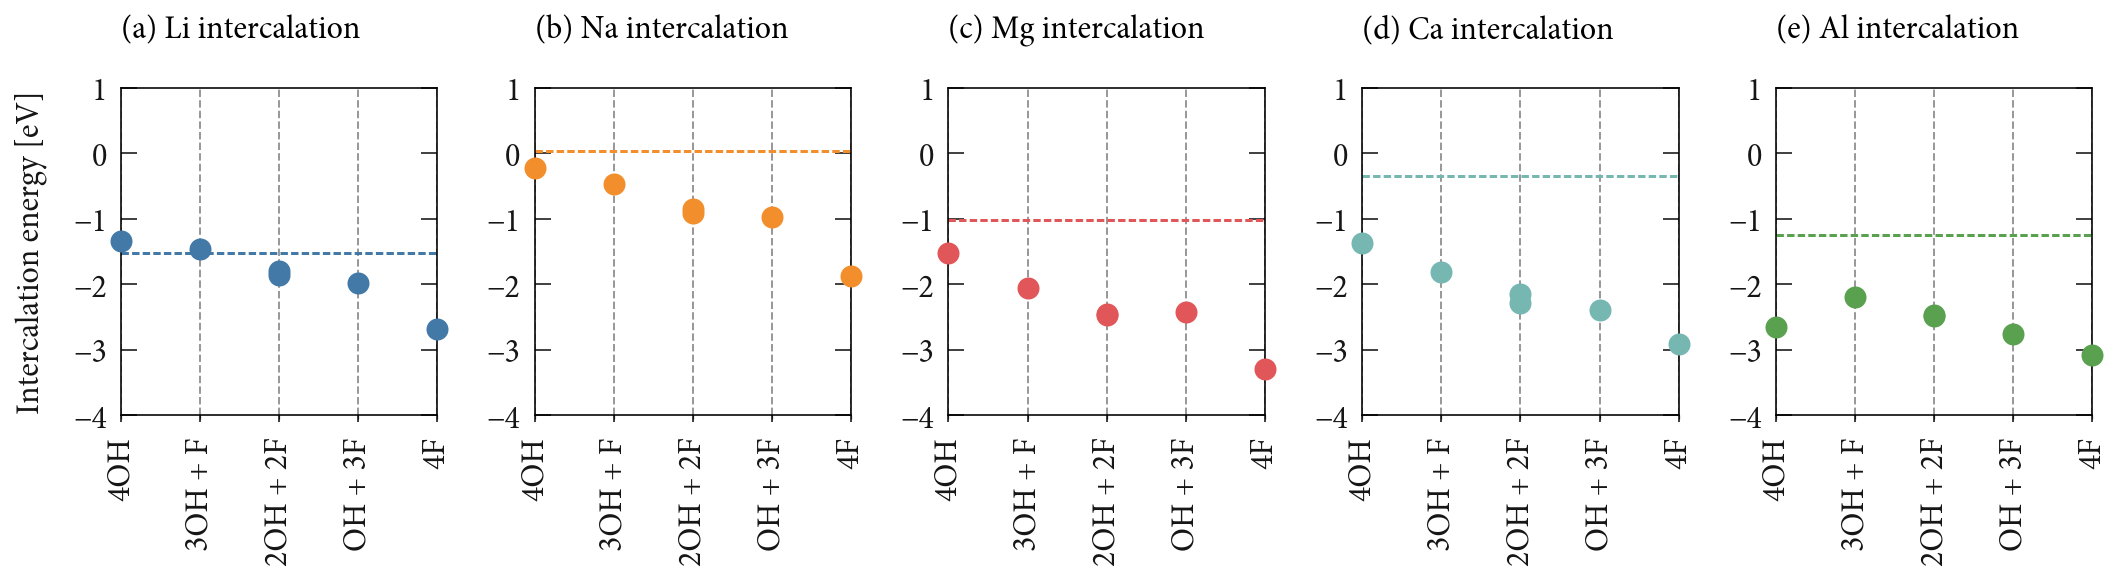

In [10]:
%%capture --no-stdout --no-display error
fig, ax = plt.subplots(1, 5, figsize=(15,4.3))
for c, i in enumerate( ions ):
    ax[c].plot( df['n_F'][:-1], df[i][:-1], 'o', color=tableau10[c], clip_on=False, zorder=10 )
    ax[c].axhline( df[i].values[-1], linestyle='--', color=tableau10[c] )
    ax[c].set_xticks( [ 0, 1, 2, 3, 4 ], [ r'4OH', '3OH + F','2OH + 2F','OH + 3F','4F'] )
    ax[c].set_xlim( 0, 4 )
    ax[c].set_xticks( [ 0, 1, 2, 3, 4 ] )
    ax[c].set_xticklabels( [ r'4OH', '3OH + F','2OH + 2F','OH + 3F','4F'], rotation='vertical' )
    ax[c].set_yticks( [ -4.0, -3.0, -2.0, -1.0, 0.0, +1.0 ] )
    ax[c].set_ylim( -4, 1.0 )
    ax[c].grid( axis='x', color='grey', linestyle='--')
#     ax[c].set_xlabel( r'Coordination anions, $X$,  in $V_\mathrm{Ti}$O$_2X_4$.' )
    ax[c].set_title('({}) {} intercalation'.format( labels[c], i ), loc='left')
ax[0].set_ylabel( 'Intercalation energy [eV]' )
plt.tight_layout()
plt.savefig( '../figures/F_TiO2_intercalation_energies.pdf' )

In [11]:
%load_ext version_information
%version_information pandas, numpy, vasppy, matplotlib, version_information

Software versions
Python 3.6.1 64bit [GCC 4.2.1 Compatible Apple LLVM 8.1.0 (clang-802.0.42)]
IPython 6.2.1
OS Darwin 16.7.0 x86_64 i386 64bit
pandas 0.20.3
numpy 1.13.3
vasppy 0.3.0
matplotlib 2.1.0
version_information 1.0.3
Fri Nov 10 11:31:18 2017 GMT